# Ising Model

* Author: Pochung Chen
* Last update: 2022/3/6

## References
* Kim Christensen and Nicholas R. Moloney, Complexity and Criticality, 1st Edition, (2005)
* Α α, Β β, Γ γ, Δ δ, Ε ε, Ζ ζ, Η η, Θ θ, Ι ι, Κ κ, Λ λ, Μ μ, Ν ν, Ξ ξ, Ο ο, Π π, Ρ ρ, Σ σ/ς, Τ τ, Υ υ, Φ φ, Χ χ, Ψ ψ, Ω ω.

In [10]:
import numpy as np
π = np.pi
import matplotlib.pyplot as plt

## Notations
* $J=1$ as the energy unit.
* $k_B=1$ for convenience.
* $\beta=1/(k_B T)$ is the inverset temperature.
* $B$ is the external field.
* $\sigma_i = \pm 1$ is the clasical Ising spin.

In [2]:
J = 1.0
kB = 1.0
Tc = 2.0/np.log(1.0+np.sqrt(2))
Tc

2.269185314213022

## One-dimensional (1D), periodic boundary condition (PBC)

### Hamiltonian:

$$ \large
  H[\{\sigma_i\}] = -J\sum_i \sigma_i \sigma_{i+1} - B\sum_i \sigma_i = -J\sum_i \sigma_i \sigma_{i+1} - \frac{B}{2}\sum_i (\sigma_i+\sigma_{i+1}).
$$

### Partition function:

$$ \large
  Z(T,B)
  = \sum_{\sigma_i} e^{-\beta H[{\sigma_i}]} 
  = \sum_{\sigma_i} e^{\beta J\sum_i \sigma_i \sigma_{i+1} + \beta \frac{B}{2}\sum_i (\sigma_i+\sigma_{i+1})}
$$

$$ \large
  Z(T,B)
  = \sum_{\sigma_i} 
  \left( e^{\beta J \sigma_1 \sigma_2 + \beta \frac{B}{2}(\sigma_1+\sigma_2)} \right)
  \left( e^{\beta J \sigma_2 \sigma_3 + \beta \frac{B}{2}(\sigma_2+\sigma_3)} \right) \cdots
  \left( e^{\beta J \sigma_N \sigma_1 + \beta \frac{B}{2}(\sigma_N+\sigma_1)} \right)
$$

### Transfer matrix

Define symmetric $2\times 2$ transfer matrix $\mathbf{T}$

$$ \large
  T_{\sigma_i,\sigma_{i+1}} \equiv e^{\beta J \sigma_i \sigma_{i+1} + \beta \frac{B}{2}(\sigma_i+\sigma_{i+1})}
$$

so that

$$ \large
  \mathbf{T} = 
  \left( \begin{array}{cc}
    T_{+1,+1} & T_{+1,-1} \\
    T_{-1,+1} & T_{-1,-1}
  \end{array} \right) =
  \left( \begin{array}{cc}
    e^{\beta J+\beta B} & e^{-\beta J} \\
    e^{-\beta J} & e^{\beta J-\beta B}
  \end{array} \right)    
$$

In [3]:
def TM1(𝛽, B, J=1):
    TM = np.zeros([2,2])
    TM[0, 0] = np.exp(+β*J+β*B)
    TM[0, 1] = np.exp(-β*J)
    TM[1, 0] = np.exp(-β*J)
    TM[1, 1] = np.exp(+β*J-β*B)
    return TM

Text(0, 0.5, '$\\lambda_{0,1}$')

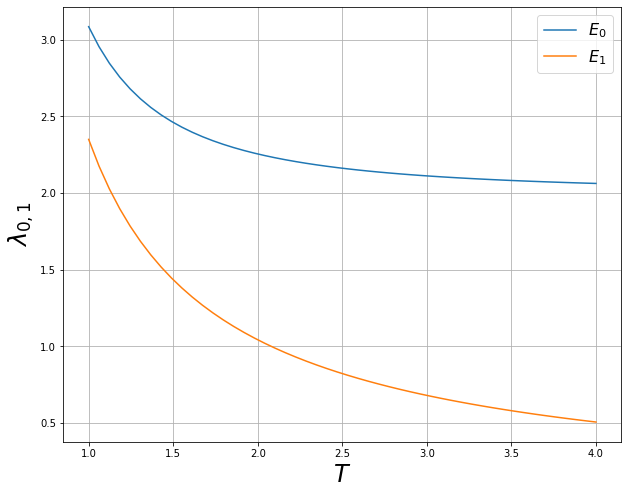

In [6]:
L = 1
B = 0
T = np.linspace(1, 4)

λ0 = np.zeros_like(T)
λ1 = np.zeros_like(T)

for i in range(T.shape[0]):
    𝛽 = 1/T[i]
    λ1[i], λ0[i] = np.linalg.eigvalsh(TM1(𝛽, B, J))

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(T, λ0, label=r'$E_0$')
ax.plot(T, λ1, label=r'$E_1$')

ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$\lambda_{0,1}$', fontsize=24)

Text(0, 0.5, '$E_{0,1}$')

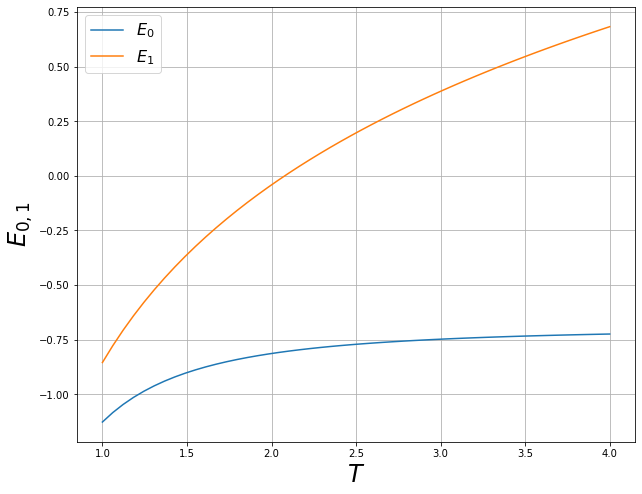

In [8]:
L = 1
B = 0
T = np.linspace(1, 4)

λ0 = np.zeros_like(T)
λ1 = np.zeros_like(T)

for i in range(T.shape[0]):
    𝛽 = 1/T[i]
    λ1[i], λ0[i] = np.linalg.eigvalsh(TM1(𝛽, B, J))

E0 = -np.log(λ0)
E1 = -np.log(λ1)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(T, E0/L, label=r'$E_0$')
ax.plot(T, E1/L, label=r'$E_1$')

ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$E_{0,1}$', fontsize=24)

## At $T_c$

In [ ]:
T = Tc
𝛽 = 1/T
L=1
λ1, λ0 = np.linalg.eigvalsh(TM1(𝛽, 0, 1))
print(λ1, λ0)
E0 = -np.log(λ0)
E1 = -np.log(λ1)
print(E0,E1)
print((E1-E0)*L/(2*π))

0.9101797211244547 2.1973682269356196
-0.7872603837897441 0.09411320322979888
0.14027496308479503


## $x_n$

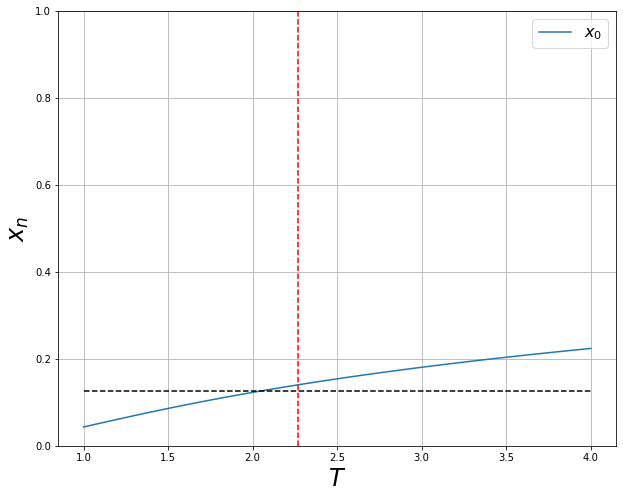

In [14]:
L = 1
B = 0
T = np.linspace(1, 4)

λ0 = np.zeros_like(T)
λ1 = np.zeros_like(T)

for i in range(T.shape[0]):
    𝛽 = 1/T[i]
    λ1[i], λ0[i] = np.linalg.eigvalsh(TM1(𝛽, B, J))

E0 = -np.log(λ0)
E1 = -np.log(λ1)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(T, (E1-E0)*L/(2*π), label=r'$x_1$')

ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$x_n$', fontsize=24)
ax.set_ylim([0,1])

ax.plot(T, (1/8)*np.ones_like(T), 'k--')
ax.plot([Tc, Tc], [0, 1], 'r--')

## $L=2$ Ladder

$$ \large
  \mathbf{TM}_2 ??= 
  \left( \begin{array}{cccc}
    e^{+6\beta J + 2\beta B} & e^{+\beta B} & e^{+\beta B} & e^{+2\beta J} \\
    e^{+\beta B} & e^{-2\beta J} & e^{-6\beta J} & e^{-\beta B} \\
    e^{+\beta B} & e^{-6\beta J} & e^{-2\beta J} & e^{-\beta B} \\
    e^{+2\beta J} & e^{-\beta B} & e^{-\beta B} & e^{+6\beta J-2\beta B}
  \end{array} \right)    
$$

$$ \large
  \mathbf{TM}_2 ??= 
  \left( \begin{array}{cccc}
    e^{+4\beta J + 2\beta B} & e^{+\beta B} & e^{+\beta B} & 1 \\
    e^{+\beta B} & 1 & e^{-4\beta J} & e^{-\beta B} \\
    e^{+\beta B} & e^{-4\beta J} & 1 & e^{-\beta B} \\
    1 & e^{-\beta B} & e^{-\beta B} & e^{+4\beta J-2\beta B}
  \end{array} \right)    
$$

In [16]:
# def TM2(𝛽, B, J=1):
#     TM = np.zeros([4,4])
#     TM[0,0],TM[0,1],TM[0,2],TM[0,3]=np.exp(+6*β*J+2*β*B),np.exp(+β*B),  np.exp(+β*B),  np.exp(+2*β*J)
#     TM[1,0],TM[1,1],TM[1,2],TM[1,3]=np.exp(+β*B),        np.exp(+2*β*J),np.exp(-6*β*J),np.exp(-β*B)
#     TM[2,0],TM[2,1],TM[2,2],TM[2,3]=np.exp(+β*B),        np.exp(-6*β*J),np.exp(+2*β*J),np.exp(-β*B)
#     TM[3,0],TM[3,1],TM[3,2],TM[3,3]=np.exp(+2*β*J),      np.exp(-β*B)  ,np.exp(-β*B),  np.exp(+6*β*J-2*β*B)    
#     return TM

def TM2(𝛽, B, J=1):
    TM = np.zeros([4,4])
    TM[0,0],TM[0,1],TM[0,2],TM[0,3]=np.exp(+4*β*J+2*β*B),np.exp(+β*B),  np.exp(+β*B),  1.0
    TM[1,0],TM[1,1],TM[1,2],TM[1,3]=np.exp(+β*B),        1,             np.exp(-4*β*J),np.exp(-β*B)
    TM[2,0],TM[2,1],TM[2,2],TM[2,3]=np.exp(+β*B),        np.exp(-4*β*J),1,             np.exp(-β*B)
    TM[3,0],TM[3,1],TM[3,2],TM[3,3]=1,                   np.exp(-β*B),  np.exp(-β*B),  np.exp(+4*β*J-2*β*B)    
    return TM

In [21]:
L = 2
B = 0

T = Tc
𝛽 = 1/T
λ3, λ2, λ1, λ0 = np.linalg.eigvalsh(TM2(𝛽, 0, 1))

# print(λ3, λ2, λ1, λ0)
E0 = -np.log(λ0)
E1 = -np.log(λ1)
E2 = -np.log(λ2)
E3 = -np.log(λ3)
print(E0,E1,E2,E3)
# print(E0/L,E1/L,E2/L,E3/L)
# print((E1-E0)*L/(2*π))

-2.010105077484762 -1.5745207675794883 0.18822640645959748 0.6238107163648697


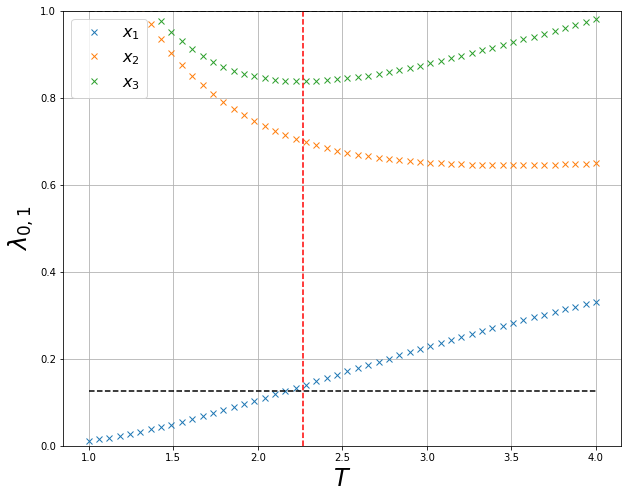

In [24]:
B = 0
L = 2 
T = np.array([Tc])
T = np.linspace(1, 4)

λ0 = np.zeros_like(T)
λ1 = np.zeros_like(T)
λ2 = np.zeros_like(T)
λ3 = np.zeros_like(T)

for i in range(T.shape[0]):
    𝛽 = 1/T[i]
    λ3[i],λ2[i],λ1[i], λ0[i] = np.linalg.eigvalsh(TM2(𝛽, B, J))

E0 = -np.log(λ0)
E1 = -np.log(λ1)
E2 = -np.log(λ2)
E3 = -np.log(λ3)


fig, ax = plt.subplots(figsize=(10,8))
ax.plot(T, (E1-E0)*L/(2*π), 'x', label=r'$x_1$')
ax.plot(T, (E2-E0)*L/(2*π), 'x', label=r'$x_2$')
ax.plot(T, (E3-E0)*L/(2*π), 'x', label=r'$x_3$')
# ax.plot(T, E1, 'x', label=r'$E_1$')

ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$\lambda_{0,1}$', fontsize=24)
ax.set_ylim([0,1])
ax.plot([Tc, Tc], [0, 1], 'r--')
ax.plot(T, (1/8)*np.ones_like(T), 'k--')
ax.plot(T, (1)*np.ones_like(T), 'k--')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

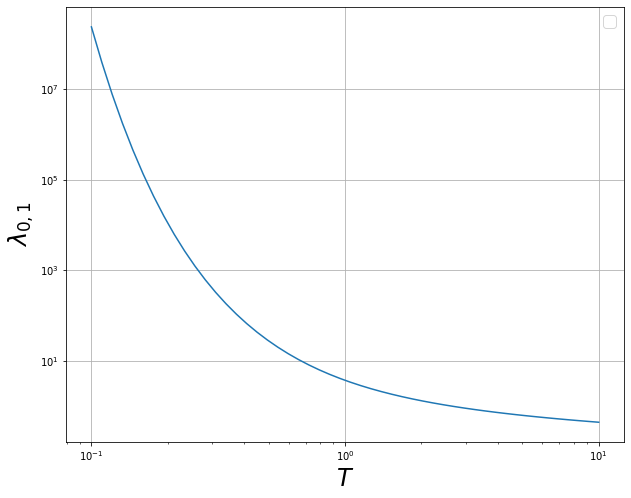

In [40]:
T = np.logspace(-1, 1)

λ0 = np.zeros_like(T)
λ1 = np.zeros_like(T)

for i in range(T.shape[0]):
    𝛽 = 1/T[i]
    λ1[i], λ0[i] = np.linalg.eigvalsh(TM1(𝛽, B, J))

xi = 1./np.log(λ0/λ1)

fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(T, λ0, label=r'$\lambda_0$')
# ax.plot(T, λ1, label=r'$\lambda_1$')
ax.plot(T,xi)
ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$\lambda_{0,1}$', fontsize=24)
ax.loglog()

Text(0, 0.5, '$\\lambda_{0,1}$')

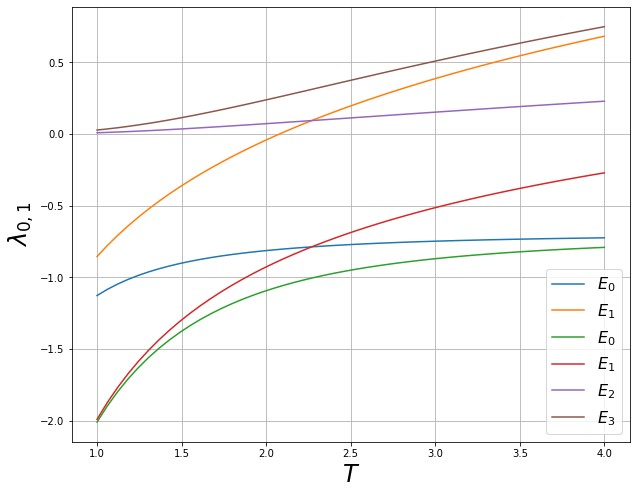

In [18]:
T = np.linspace(1, 4)

T = np.linspace(1, 4)

λ0 = np.zeros_like(T)
λ1 = np.zeros_like(T)

for i in range(T.shape[0]):
    𝛽 = 1/T[i]
    λ1[i], λ0[i] = np.linalg.eigvalsh(TM1(𝛽, 0, J))

E0 = -np.log(λ0)
E1 = -np.log(λ1)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(T, E0, label=r'$E_0$')
ax.plot(T, E1, label=r'$E_1$')

λ0 = np.zeros_like(T)
λ1 = np.zeros_like(T)
λ2 = np.zeros_like(T)
λ3 = np.zeros_like(T)

for i in range(T.shape[0]):
    𝛽 = 1/T[i]
    λ3[i], λ2[i], λ1[i], λ0[i] = np.linalg.eigvalsh(TM2(𝛽, B, J))

E0 = -np.log(λ0)
E1 = -np.log(λ1)
E2 = -np.log(λ2)
E3 = -np.log(λ3)

ax.plot(T, E0/2, label=r'$E_0$')
ax.plot(T, E1/2, label=r'$E_1$')
ax.plot(T, E2/2, label=r'$E_2$')
ax.plot(T, E3/2, label=r'$E_3$')

ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$\lambda_{0,1}$', fontsize=24)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

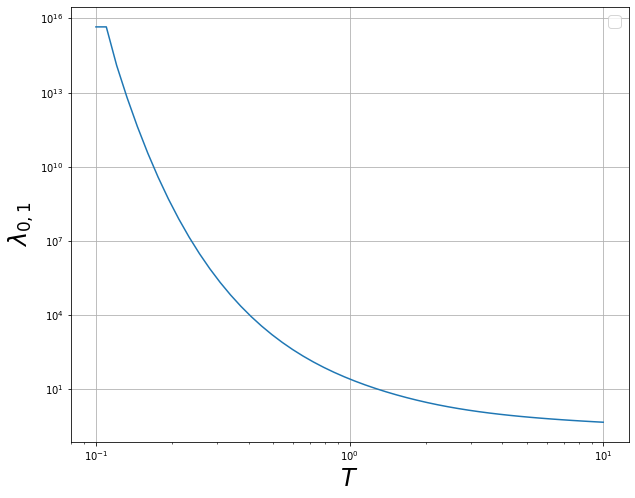

In [11]:
T = np.logspace(-1, 1)

λ0 = np.zeros_like(T)
λ1 = np.zeros_like(T)
λ2 = np.zeros_like(T)
λ3 = np.zeros_like(T)

for i in range(T.shape[0]):
    𝛽 = 1/T[i]
    λ3[i], λ2[i], λ1[i], λ0[i] = np.linalg.eigvalsh(TM2(𝛽, B, J))

xi = 1./np.log(λ0/λ1)
fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(T, λ0, label=r'$\lambda_0$')
# ax.plot(T, λ1, label=r'$\lambda_1$')
ax.plot(T, xi)
ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$\lambda_{0,1}$', fontsize=24)
ax.loglog()

Text(0, 0.5, '$\\lambda_{0,1}$')

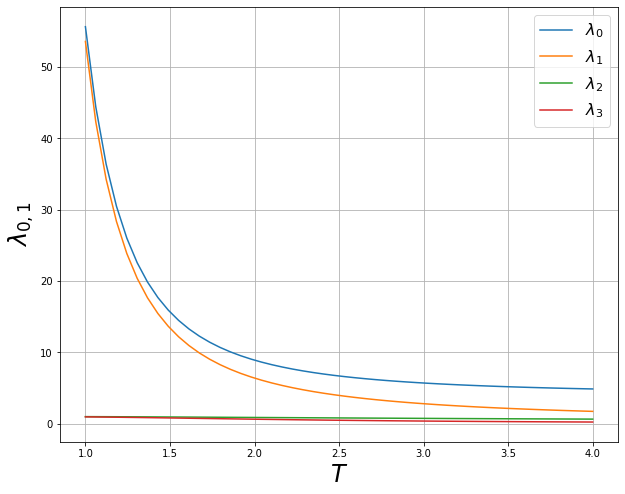

In [10]:
# T = np.logspace(-1, 1)
T = np.linspace(1,4)

λ0 = np.zeros_like(T)
λ1 = np.zeros_like(T)
λ2 = np.zeros_like(T)
λ3 = np.zeros_like(T)

for i in range(T.shape[0]):
    𝛽 = 1/T[i]
    λ3[i], λ2[i], λ1[i], λ0[i] = np.linalg.eigvalsh(TM2(𝛽, B, J))

xi = 1./np.log(λ0/λ1)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(T, λ0, label=r'$\lambda_0$')
ax.plot(T, λ1, label=r'$\lambda_1$')
ax.plot(T, λ2, label=r'$\lambda_2$')
ax.plot(T, λ3, label=r'$\lambda_3$')


ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$\lambda_{0,1}$', fontsize=24)
# ax.loglog()

### Partition function in terms of the transfer matrix

$$ \large
  Z = \sum_{\sigma_1=\pm1} \sum_{\sigma_2=\pm1} \cdots \sum_{\sigma_N=\pm1} T_{\sigma_1,\sigma_2} T_{\sigma_2,\sigma_3} \cdots T_{\sigma_N,\sigma_1}
  = \sum_{\sigma_1} \mathbf{T}^N_{\sigma_1,\sigma_1} = \text{Tr}(\mathbf{T}^N).
$$

[]

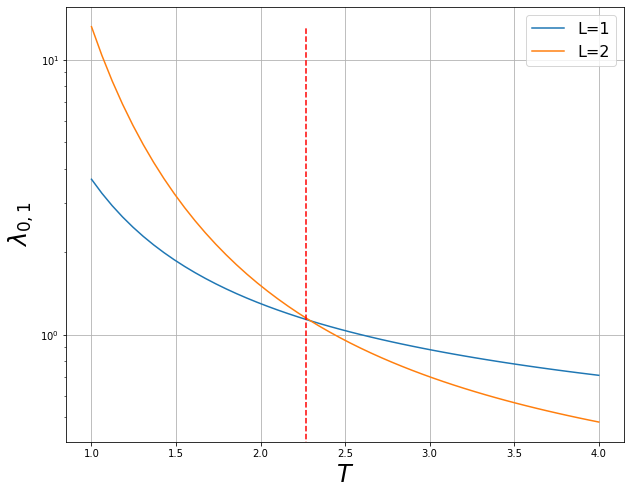

In [15]:
T = np.linspace(1, 4)

λ0 = np.zeros_like(T)
λ1 = np.zeros_like(T)

for i in range(T.shape[0]):
    𝛽 = 1/T[i]
    λ1[i], λ0[i] = np.linalg.eigvalsh(TM1(𝛽, B, J))

xi = 1./np.log(λ0/λ1)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(T,xi,label='L=1')

λ0 = np.zeros_like(T)
λ1 = np.zeros_like(T)
λ2 = np.zeros_like(T)
λ3 = np.zeros_like(T)

for i in range(T.shape[0]):
    𝛽 = 1/T[i]
    λ3[i], λ2[i], λ1[i], λ0[i] = np.linalg.eigvalsh(TM2(𝛽, B, J))

xi = 1./np.log(λ0/λ1)
ax.plot(T,xi/2,label='L=2')


ax.plot([Tc, Tc], [0, np.max(xi/2)], 'r--')

ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$\lambda_{0,1}$', fontsize=24)
ax.semilogy()

### Diagonalize a real, symmetric matrix $\mathbf{T}$ by a $2\times 2$ unitary matrix $\mathbf{U}$:

$$ \large
  \mathbf{U}^{-1}\mathbf{T}\mathbf{U}=
  \left( \begin{array}{cc}
  \lambda_+ & 0 \\
  0 & \lambda_-
  \end{array} \right),
$$
where $\lambda_+ > \lambda_-$. 

So that
$$ \large
  Z = \text{Tr}(\mathbf{T}^N) = \text{Tr}(\mathbf{U}^N) = \lambda^N_+ + \lambda^N_- ,
$$

where
$$ \large
  \lambda_\pm 
  = e^{\beta J} \cosh(\beta B) \pm \sqrt{e^{-2\beta J}+e^{2\beta J}\sinh^2(\beta B)}
  = e^{\beta J} \left[
  \cosh(\beta B) \pm \sqrt{\sinh^2(\beta B) + e^{-4\beta J}}
  \right]
$$

In [5]:
def λp(𝛽, B, J=1):
    return np.exp(𝛽*J)*(np.cosh(𝛽*B)+np.sqrt(np.sinh(𝛽*B)**2+np.exp(-4*𝛽*J)))

def λm(𝛽, B, J=1):
    return np.exp(𝛽*J)*(np.cosh(𝛽*B)-np.sqrt(np.sinh(𝛽*B)**2+np.exp(-4*𝛽*J)))

[]

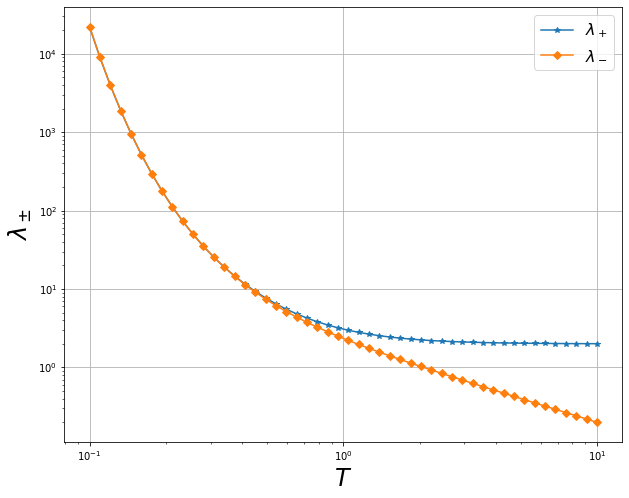

In [6]:
B = 0
# T = np.linspace(0.1, 10)
T = np.logspace(-1, 1)
𝛽 = 1/T

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(T, λp(𝛽, B, J), '*-', label=r'$\lambda_+$')
ax.plot(T, λm(𝛽, B, J), 'D-', label=r'$\lambda_-$')
ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$\lambda_\pm$', fontsize=24)
ax.loglog()

### Thermodynamic limit

In the thermodynamic limit

$$ \large
  \lim_{N\rightarrow \infty} Z = 
  \lambda_+^N \left( 1 +  \left( \frac{\lambda_-}{\lambda_+}\right)^N \right) = \lambda_+^N.  
$$

### Correlation

$$ \large
  \langle \sigma_1 \sigma_3 \rangle = \frac{1}{Z_N}
  \sum_{\sigma_1=\pm1} \sum_{\sigma_2=\pm1} \cdots \sum_{\sigma_N=\pm1} \sigma_1 T_{\sigma_1,\sigma_2} T_{\sigma_2,\sigma_3} \sigma_3 T_{\sigma_3, \sigma_4} \cdots T_{\sigma_N,\sigma_1}
  = \sum_{\sigma_1} \mathbf{T}^N_{\sigma_1,\sigma_1}.
$$

Define
$$ \large
  T^z_{\sigma, \sigma^\prime}=\sigma \delta_{\sigma, \sigma^\prime}
$$
$$ \large
  \mathbf{T^z} = 
  \left( \begin{array}{cc}
    +1 & 0 \\
    0 & -1
  \end{array} \right)    
$$

We find
$$ \large
  \langle \sigma_i \sigma_j \rangle = \frac{1}{Z_N} \text{Tr}(\mathbf{T^z}\mathbf{T^{j-i}}\mathbf{T^z} \mathbf{T}^{N+i-j}).
$$
$$ \large
  \langle \sigma_i \rangle = \frac{1}{Z_N} \text{Tr}(\mathbf{T^z}\mathbf{T^{N}}).
$$

### $U$ matrix

Define $\phi$ by the equation

$$ \large
 \cot(2\phi) = 2^{\beta J} \sinh(\beta B),
$$
where $0 < \phi < \pi/2$. Theun $U$ can be expressed as
$$ \large
U = 
\left( \begin{array}{cc} 
  \cos(\phi) & -\sin(\phi) \\
  \sin(\phi) & \cos(\phi)
\end{array} \right)
$$

### Thermodynamic limit

In the thermodynamic limit

$$ \large
  \langle \sigma_i \sigma_j \rangle = \cos(2\phi)^2+\sin(2\phi)^2 \left(\frac{\lambda_-}{\lambda_+} \right)^{j-i} 
  = \langle \sigma_i\rangle \langle \sigma_j \rangle +\sin(2\phi)^2 \left(\frac{\lambda_-}{\lambda_+} \right)^{j-i} .
$$
$$ \large
  \langle \sigma_i \rangle = \cos(2\phi).
$$

### Correlation length

$$ \large
  \xi = \frac{1}{\ln \left( \frac{\lambda_+}{\lambda_-} \right)}
$$

[]

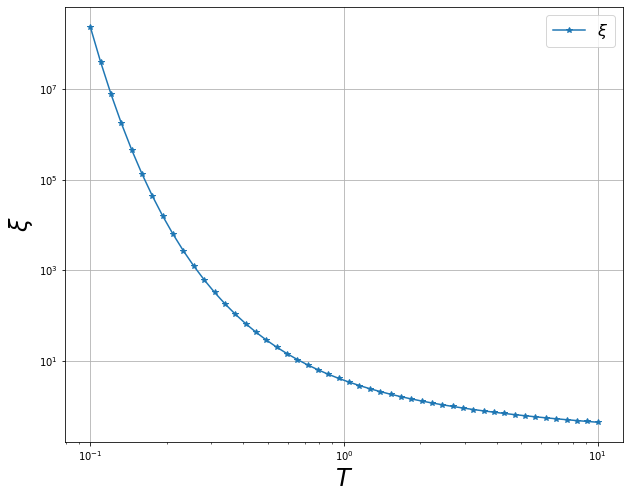

In [7]:
B = 0
# T = np.linspace(0.1, 10)
T = np.logspace(-1, 1)
𝛽 = 1/T

ξ = 1./np.log(λp(𝛽, B, J)/λm(𝛽, B, J))

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(T, ξ, '*-', label=r'$\xi$')
ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$\xi$', fontsize=24)
ax.loglog()

## Two-Leg Ladder, PBC

Specify a basis $++, +-, -+, --$.

Define the 4x4 transfer matrix.
$$
T = 
\left[ \begin{eqnarray}{cccc}
\end{eqnarray} \right]
$$




## Four-Leg Ladder, PBC

## 2D, PBC